**Libraries**

In [1]:
%pip install statsmodels

import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.preprocessing import OneHotEncoder
import pickle

Note: you may need to restart the kernel to use updated packages.


Firstly, we should call some variables from data cleaning process.

In [2]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

**Handle Outlier**

In this step, there's need to check for outliers. Since our given evaluation metric is 'RMSE', which is sensitive to large errors, outliers can significantly handle the measurement.

**Outlier Detection**

Here, we're basically looking at the data, to understand it's status...

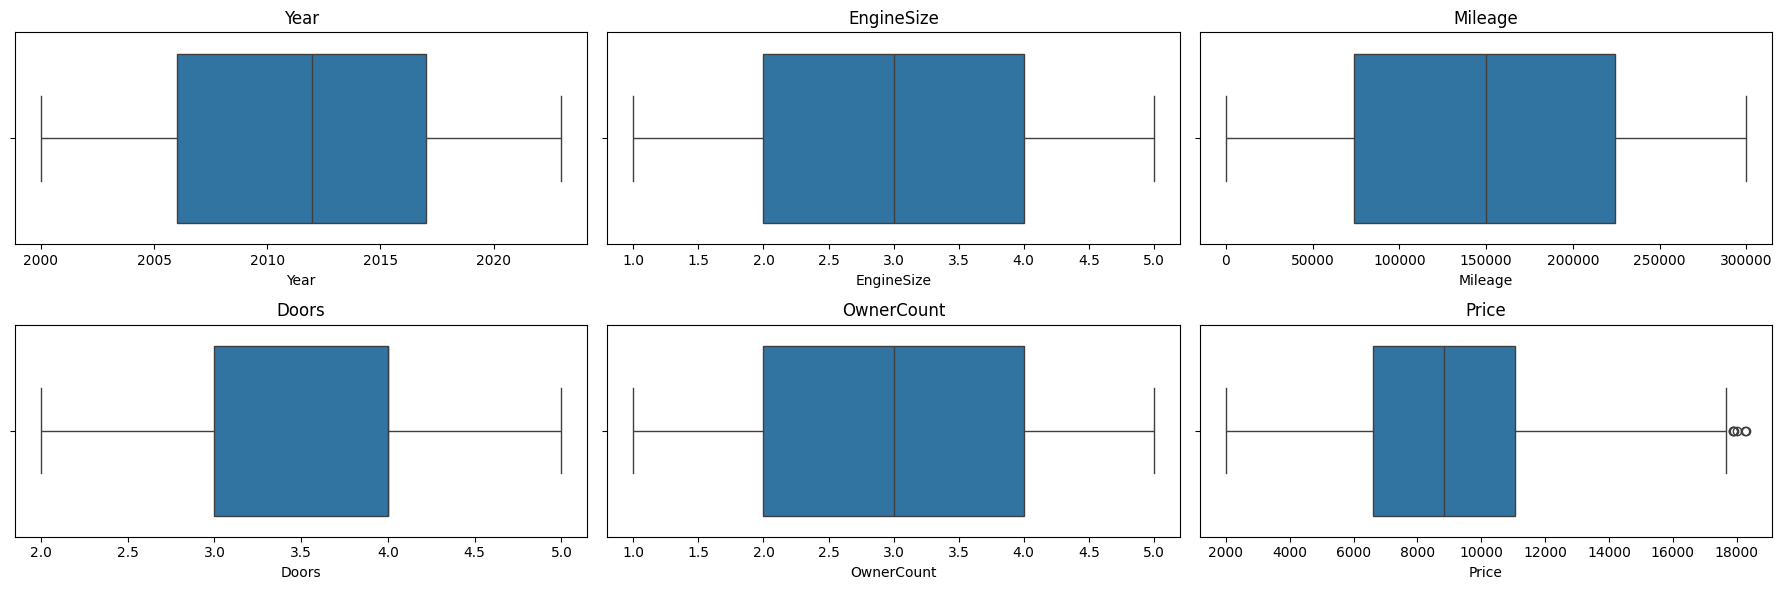

In [3]:
def box_plot(columns):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,6))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.tight_layout()
    plt.show()

# Example usage:
box_plot(numeric_columns[:6])

**Categorical Encoding**

**Mean-Target Encoding**

Since 'Brand' and 'Model' have many unique values (high cardinality), we use Mean Target encoding for them.
 - Calculate the Mean Target (Price) for each! category.
 - Replace category in with  it's corresponding Mean Price.

In [4]:
#Brand
brand_mean_price = df.groupby('Brand')['Price'].mean()
df['Encoded_Brand'] = df['Brand'].map(brand_mean_price)

#Model
model_mean_price = df.groupby('Model')['Price'].mean()
df['Encoded_Model'] = df['Brand'].map(model_mean_price)

#Drop
df.drop(['Brand', 'Model'], axis=1, inplace=True)

For future usage, this must be saved!

In [5]:
with open('../../models/Brand_Encoder.pkl', 'wb') as f:
    pickle.dump(brand_mean_price, f)

with open('../../models/Model_Encoder.pkl', 'wb') as f:
    pickle.dump(model_mean_price, f)




**One-Hot Encoding**

Here, for 'Transmission' and 'Fuel', just because they don't have too many cardinality, we can use one-hot encoding...

In [7]:
# Select categorical columns to encode
categorical_cols = ['Fuel', 'Transmission']

# Define OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform only selected categorical columns
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded ones
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df_encoded, encoded_df], axis=1)

The encoder is needed for the test and unseen data

In [8]:
with open('../../models/OneHot_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

**CHECKPOINT**

In [9]:
%store df 

Stored 'df' (DataFrame)
